<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/Copy_of_Instructions_coin_tosses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports here
import numpy as np
import matplotlib.pylab as plt
import scipy as sp

In [2]:
np.random.rand()

0.30331709394556594

In [3]:
from typing import Container
# get 10 coin tosses with the numpy.random.rand function, make a histogram
np.random.seed(6220)
cointainer = []
N = 10
for i in range(N):
  cointainer.append(np.round(np.random.rand()))

cointainer

[np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.0),
 np.float64(0.0)]

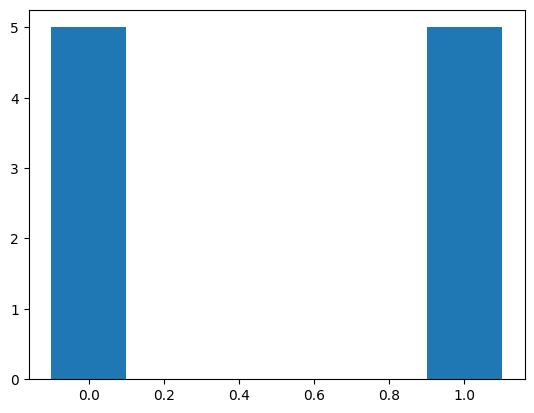

In [4]:
plt.hist(cointainer, bins=[-0.1, 0.1,0.9,1.1]);

P(H) =


P(HH) =

P(HHT) =

P(2H & 1T) =  

$P(N_H; N_T) = P(H)^{N_H} * P(T)^{N_T} * {N_H + N_T \choose  N_H} $

In [ ]:
from math import comb
P_2H_8T = ...
print(f"the probability of 2H and 8T is {P_2H_8T}")

the probability of 2H and 8T is 0.0439453125


# Fair coin

The binomial distribution is the distribution that described the probability of getting outcome X $N$ times out of $M$ trials for a 2-outcome experiments with each trial with the same probability P(X).

Now show binomial distribution for 30 coin tosses of a _fair_ coin.

In [ ]:
sp.stats.binom?

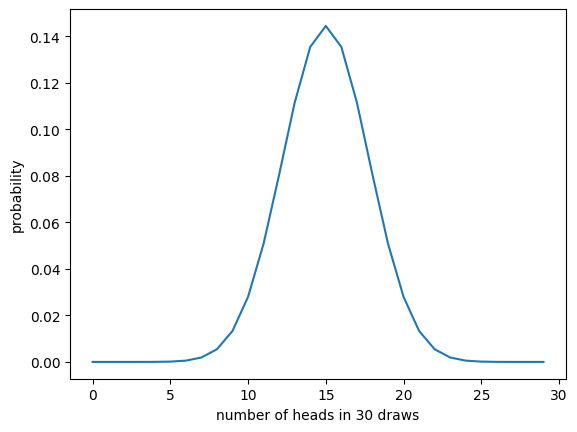

In [5]:
support = np.arange(0, 30)
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# vegas coin
lets weight the coin toward tail (by 30%) and show the binomial distribution of probabilities

Now get 10 draws from the same probability distributin, plot the histogram of outcomes, and compare it to the _theoretical_ binomial probability distributions

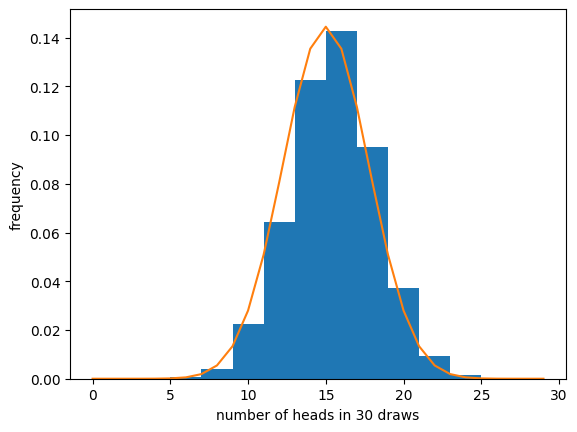

In [6]:
...
draws = sp.stats.binom.rvs(30, 0.5, size=10000)
plt.hist(draws, density=True);
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

In [ ]:
#Do it for a sample of 100
...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

In [ ]:
#Do it for a sample of 1000
...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

now do it for the vegas coin we used before

In [ ]:
#vegas coin
#Do it for a sample of 1000

...
plt.xlabel("number of heads in 30 draws")
plt.ylabel("frequency");

In [ ]:
# we can also do it the hacky way if we dont know or want to use a package with a fundtion that is under the hood and we dont see
cointoss = np.zeros(10_000)
for i in range(10_000):
  cointoss[i] = np.round(np.random.rand(30)).sum()

plt.hist(cointoss, bins=np.arange(-0.5,30), density=True);
#cointoss
plt.ylabel("frequency")
plt.xlabel("number of heads in 30 draws");


In [ ]:
print(plt.hist(cointoss, bins=np.arange(-0.5,30), density=True)[0].sum())
plt.plot(support, sp.stats.binom.pmf(support, 30, 0.5));

plt.xlabel("number of heads in 30 draws")
plt.ylabel("probability");

# BAYESIAN PROBABILITY
add a prior : you are in vegas and you are sure you are going to get tricked - assume your coin has 0 probability to get heads

In [7]:
x = np.linspace(0.0, 1, 100)

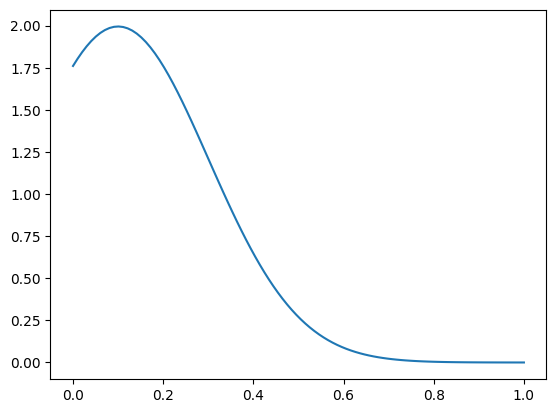

In [11]:
#prior = np.zeros_like(x)
#prior[:50] = 1
prior = sp.stats.norm.pdf(x, 0.1, 0.2)
plt.plot(x, prior);

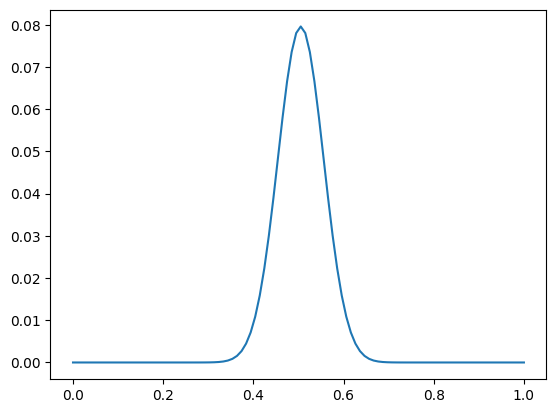

In [13]:
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood);

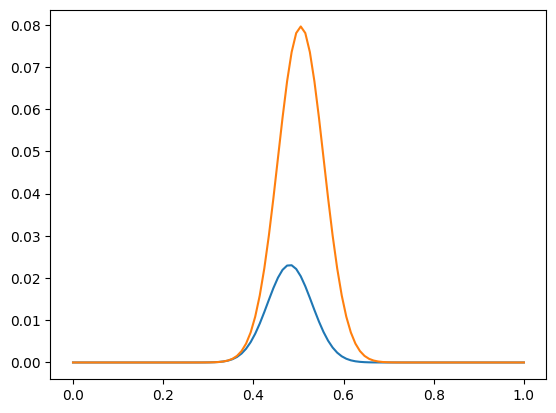

In [14]:
plt.plot(x, likelihood*prior)
plt.plot(x, likelihood);

In [ ]:
#0 probability of getting heads=1, 100% probability of getting tails...
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.yticks([0, 1], ["head", "tail"]);

In [ ]:
#BAYES THEOREM:
#Posterior = likelihood * prior / evidence ~ likelihood * priori
x = np.linspace(0.0, 1, 100)
likelihood = sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5)
posterior = ...
plt.plot(x, posterior, label="unnormalized probability")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

In [ ]:
#try a continuous, never 0 prior
prior = ...
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);


In [ ]:
posterior = ...
plt.plot(x, posterior, label="unnormalized posterior unfair coin")
plt.plot(x, sp.stats.binom.pmf((x * 100).astype(int), 100, 0.5) / 3.45, label="fair coin")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);